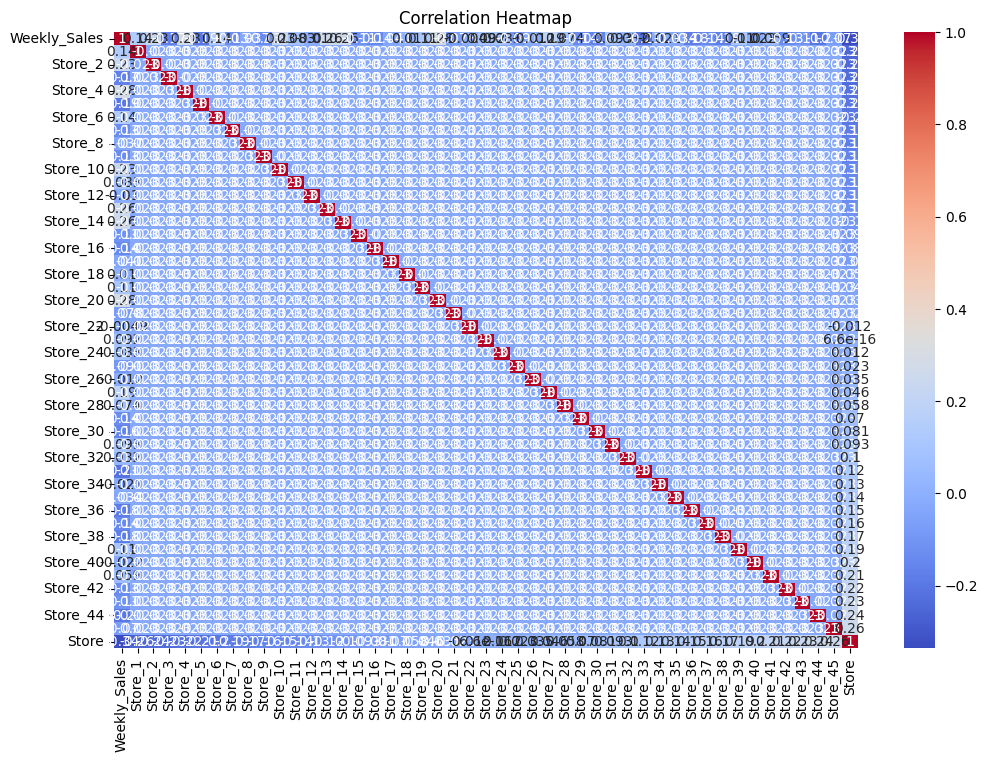

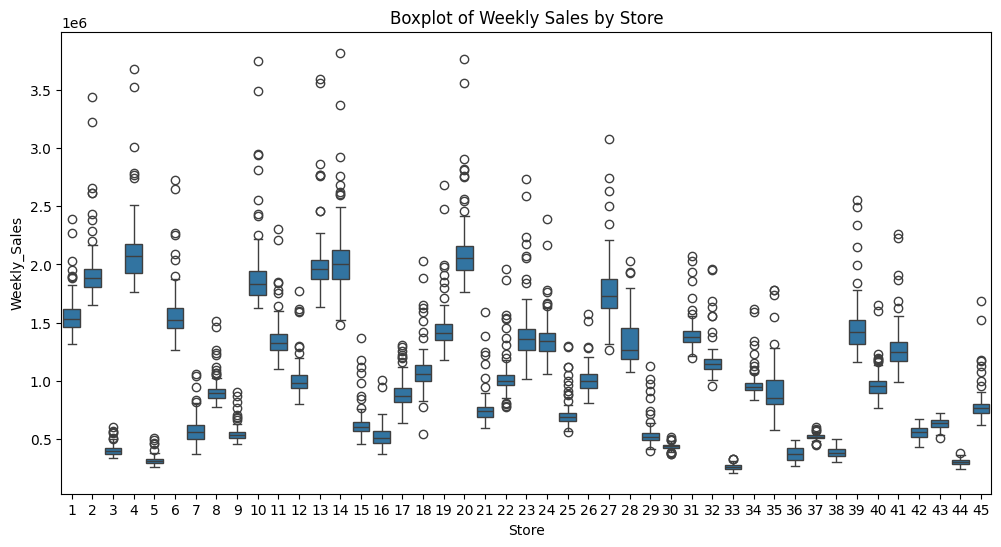

Best Hyperparameters: {'regressor__max_depth': 11, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2}
Root Mean Square (RMS) value: 238517.68434447507


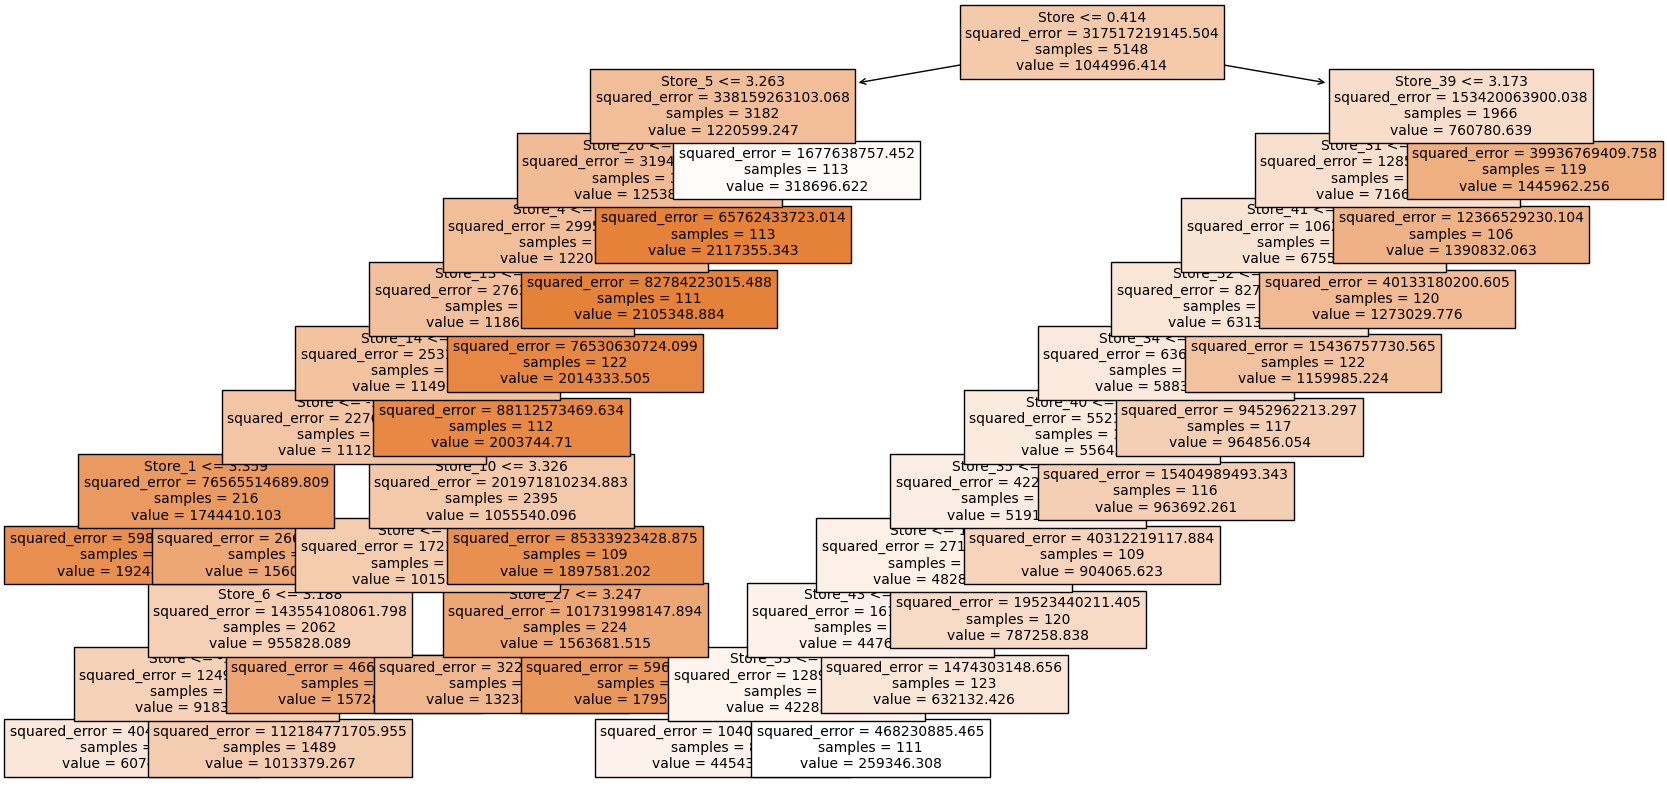

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "/content/Walmart_sales.csv"
data = pd.read_csv(url)

# Preprocessing the Dataset
# Drop rows with missing values in the 'Weekly_Sales' column
data = data.dropna(subset=['Weekly_Sales'])

# Save the 'Store' column before dropping it
stores = data['Store']

# Drop columns that won't be used for prediction
data = data.drop(['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag'], axis=1)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Store'])

# Re-add the 'Store' column
data['Store'] = stores

# Split the dataset into features and target variable
X = data.drop('Weekly_Sales', axis=1)
y = data['Weekly_Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizing the Data
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplot of Weekly Sales by Store
plt.figure(figsize=(12, 6))
sns.boxplot(x='Store', y='Weekly_Sales', data=data)
plt.title('Boxplot of Weekly Sales by Store')
plt.show()

# Hyperparameter Tuning
numeric_features = list(X.select_dtypes(include=[np.number]).columns)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', DecisionTreeRegressor(random_state=42))])

param_grid = {
    'regressor__max_depth': [3, 5, 7, 9, 11],
    'regressor__min_samples_split': [2, 5, 10, 15, 20],
    'regressor__min_samples_leaf': [1, 2, 4, 6, 8]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

model = grid_search.best_estimator_
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test)

# Calculate the Root Mean Square (RMS) value
rms = np.sqrt(mean_squared_error(y_test, y_pred))

print("Best Hyperparameters:", best_params)
print("Root Mean Square (RMS) value:", rms)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model.named_steps['regressor'], feature_names=X.columns, filled=True, fontsize=10)
plt.show()
